In [272]:
import pandas as pd

input_files = []
df = pd.read_csv('conf.csv')
print('# of jobs', df['jobid'].count(), '\nColumns:', df.columns)

# of jobs 98727 
Columns: Index(['index', 'state', 'submitTime', 'startTime', 'finishTime', 'queueTime',
       'runTime', 'HDFS_INPUT_SIZE', 'HDFS_OUTPUT_SIZE', 'MAP_CPU_USAGE_MSEC',
       'REDUCE_CPU_USAGE_MSEC', 'MAP_MEM_USAGE_B', 'REDUCE_MEM_USAGE_B',
       'HIVE_RECORDS_IN', 'HIVE_RECORDS_OUT', 'HIVE_RECORDS_INTERMEDIATE',
       'jobid', 'query', 'outputdir', 'workflow', 'scratchdir', 'sessionid',
       'query.id', 'local.scratchdir', 'user.name', 'job', 'inputdir'],
      dtype='object')


In [273]:
n_jobs = df['jobid'].count()
dfstate = df.groupby('state').size().reset_index(name='counts')
dfstate['failure%'] = 100*dfstate['counts']/n_jobs
print(dfstate)

       state  counts   failure%
0     FAILED      28   0.028361
1     KILLED     114   0.115470
2  SUCCEEDED   98585  99.856169


In [274]:
import sqlparse


In [275]:
qdf = df[df['state']=='SUCCEEDED']

q1T = qdf[(qdf['HDFS_INPUT_SIZE'] > (1024*1024*1024*1024)) & (qdf['user.name'] =='netappiq')]


print(q1T['HDFS_INPUT_SIZE'].sum()/(1024*1024*1024*1024))

for index, row in q1T.iterrows():
    print(datetime.datetime.fromtimestamp(row['startTime']//1000), row['user.name'], 
          str(row['HDFS_INPUT_SIZE']//(1024*1024*1024*1024)) +'TB', 
          str(row['HDFS_OUTPUT_SIZE']//(1024*1024*1024)) + 'GB') 

1793.4569151559554
2018-08-12 20:48:25 netappiq 19TB 16GB
2018-08-12 20:49:23 netappiq 19TB 16GB
2018-08-12 20:56:41 netappiq 6TB 134GB
2018-08-12 21:01:10 netappiq 2TB 8GB
2018-08-12 21:02:23 netappiq 37TB 15GB
2018-08-12 21:02:35 netappiq 37TB 15GB
2018-08-12 21:24:18 netappiq 2TB 379GB
2018-08-12 22:26:02 netappiq 2TB 80GB
2018-08-12 22:27:09 netappiq 37TB 573GB
2018-08-12 22:27:15 netappiq 37TB 573GB
2018-08-12 22:40:19 netappiq 19TB 14GB
2018-08-12 22:45:57 netappiq 2TB 38GB
2018-08-12 22:57:45 netappiq 2TB 14GB
2018-08-12 23:11:47 netappiq 19TB 14GB
2018-08-12 23:14:48 netappiq 2TB 5GB
2018-08-12 23:39:00 netappiq 19TB 1604GB
2018-08-13 00:19:50 netappiq 19TB 1604GB
2018-08-13 01:07:56 netappiq 19TB 510GB
2018-08-13 01:20:39 netappiq 19TB 510GB
2018-08-13 20:57:04 netappiq 19TB 16GB
2018-08-13 20:57:08 netappiq 19TB 16GB
2018-08-13 21:07:47 netappiq 6TB 135GB
2018-08-13 21:11:58 netappiq 2TB 8GB
2018-08-13 21:12:26 netappiq 36TB 14GB
2018-08-13 21:12:39 netappiq 36TB 14GB
2018-08

In [279]:
# get jobs for bin
import ast
import datetime
from moz_sql_parser import parse
import json

qdfu = qdf[qdf['user.name']=='sam1']
#print(qdfu['query'].values,'\n', qdfu['submitTime'], qdfu['HDFS_INPUT_SIZE'])


query ='''INSERT into table test_nb_db.raid_config_table 
            select asup_key ,log_name ,event_date ,sequence_id ,severity ,event_type ,message ,dt,
            COALESCE(e.tags['bay'], -1) bay,
            COALESCE(e.tags['failure_reason'], -1) failure_reason,
            COALESCE(e.tags['ems.type'], -1) ems_type,
            COALESCE(e.tags['vendor'], -1) vendor,
            COALESCE(e.tags['system_key'], -1) system_key,
            COALESCE(e.tags['disk_info'], -1) disk_info,
            COALESCE(e.tags['ems.seq'], -1) ems_seq,
            COALESCE(e.tags['disk_rpm'], -1) disk_rpm,
            COALESCE(e.tags['ems.name'], -1) ems_name,
            COALESCE(e.tags['carrier'], -1) carrier,
            COALESCE(e.tags['shelf'], -1) shelf,
            COALESCE(e.tags['ems.vf'], -1) ems_vf,
            COALESCE(e.tags['sys_version'], -1) sys_version,
            COALESCE(e.tags['sys_serial_no'], -1) sys_serial_no,
            COALESCE(e.tags['firmware_revision'], -1) firmware_revision,
            COALESCE(e.tags['ems.t'], -1) ems_t,
            COALESCE(e.tags['ems.id'], -1) ems_id,
            COALESCE(e.tags['serialno'], -1) serialno,
            COALESCE(e.tags['model'], -1) model,
            COALESCE(e.tags['ems.d'], -1) ems_d,
            COALESCE(e.tags['disk_type'], -1) disk_type,
            COALESCE(e.tags['asup_id'], -1) asup_id,
            COALESCE(e.tags['system_id'], -1) system_id,
            COALESCE(e.tags['ems.p'], -1) ems_p,
            COALESCE(e.tags['site'], -1) site,
            COALESCE(e.tags['ems.s'], -1) ems_s,
            COALESCE(e.tags['ems.n'], -1) ems_n,
            COALESCE(e.tags['ems.o'], -1) ems_o,
            COALESCE(e.tags['blockNum'], -1) blockNum,
            COALESCE(e.tags['owner'], -1) owner,
            COALESCE(e.tags['rg'], -1) rg,
            COALESCE(e.tags['vbn'], -1) vbn
            from default.ems e 
            where dt > '2018-08-10' and dt <= '2018-08-13'
            and 
            (LOWER(event_type) in ('raid_config_disk_failed_1' ,
            'raid_config_filesystem_disk_admin_failed_1',
            'raid_config_filesystem_disk_admin_failed_after_copy_1',
            'raid_config_filesystem_disk_failed_1',
            'raid_config_filesystem_disk_failed_after_copy_1',
            'raid_config_filesystem_disk_not_responding_1',
            'raid_config_spare_disk_missing_1',
            'raid_multierr_bad_missingblk_1',
            'raid_multierr_lw_block_rewrite_1')
            ) '''


#query = qdfu['query'].values[0]
print(json.dumps(parse(query), indent=4))
#parsed = sqlparse.parse(query)[0]
#for x in parsed.tokens:
#    print(x.ttype)
#print(parsed.tokens)

#print(datetime.datetime.fromtimestamp(qdfu['submitTime']/1000))
#for index, row in qdfu.iterrows():
#    print(datetime.datetime.fromtimestamp(row['submitTime']/1000), row['query'], '\n')#, row['HDFS_INPUT_SIZE'], row['HDFS_OUTPUT_SIZE'])
    

INSERT into table test_nb_db.raid_config_table 
            select asup_key ,log_name ,event_date ,sequence_id ,severity ,event_type ,message ,dt,
            COALESCE(e.tags['bay'], -1) bay,
            COALESCE(e.tags['failure_reason'], -1) failure_reason,
            COALESCE(e.tags['ems.type'], -1) ems_type,
            COALESCE(e.tags['vendor'], -1) vendor,
            COALESCE(e.tags['system_key'], -1) system_key,
            COALESCE(e.tags['disk_info'], -1) disk_info,
            COALESCE(e.tags['ems.seq'], -1) ems_seq,
            COALESCE(e.tags['disk_rpm'], -1) disk_rpm,
            COALESCE(e.tags['ems.name'], -1) ems_name,
            COALESCE(e.tags['carrier'], -1) carrier,
            COALESCE(e.tags['shelf'], -1) shelf,
            COALESCE(e.tags['ems.vf'], -1) ems_vf,
            COALESCE(e.tags['sys_version'], -1) sys_version,
            COALESCE(e.tags['sys_serial_no'], -1) sys_serial_no,
            COALESCE(e.tags['firmware_revision'], -1) firmware_revision,
    

ParseException: Expected select, found 'I'  (at char 0), (line:1, col:1)

In [139]:
import datetime

print(qdf['user.name'].nunique())
dfuser = qdf.groupby('user.name').size().reset_index(name='counts')
print(dfuser)

for index, row in dfuser.iterrows():
    print(row['user.name'], row['counts'])

68
   user.name  counts
0   akshatab      47
1    andrewv      21
2   anindyas      13
3       anki      72
4    asonali      66
..       ...     ...
63  uppuluri      17
64    vinayn     106
65  vindhyas      57
66  vmadhuri      10
67      wilp     357

[68 rows x 2 columns]
akshatab 47
andrewv 21
anindyas 13
anki 72
asonali 66
asupdl 15243
asupdwp 6
asupprod 35
avijits 9
balaji 13
bdillon 1
beattie 22
benl 40
bin 1
bingen 5
bkondare 24
boost 1069
crajesh 151
delder 2
deshpana 46
edwdljob 60
etlhive 183
ferrara 3
gkasha 3361
hadrian 1
jeffreym 73
kallol 2950
kavithad 125
kumarswr 21
madav 346
maheshg 21
mamol 2
mamtap 102
manish6 51
mercer 9
minhp 14
mphani 208
naveed 54
netappiq 64587
nibu 17
padmad 14
pchris 8
rameshpb 439
ranganat 21
rlawson 113
rnaik 206
root 7
rukma 21
saia 7895
sam1 5
samyam 22
shalinip 50
shubhvar 7
simonh 2
smorris 30
srijitn 8
sudarsht 2
swarupm 46
szachary 2
tonyz 2
ttho 52
ukoodali 1
upasanaw 11
uppuluri 17
vinayn 106
vindhyas 57
vmadhuri 10
wilp 357


In [118]:
import datetime

qdfa = qdf[qdf['user.name']=='saia']

timeseries = ['None']
for index, row in qdfa.iterrows():
    qparts = row['query'].replace('\n\n', '').split(' ')
    
    if qparts[3] != timeseries[-1]:
        timeseries.append(qparts[3])
for x in timeseries:
    print(x, timeseries.count(x))


None 1
default.DFM_SERVICE 7
default.DFM_SYSTEM_INFO 7
default.DQP_DETAILS 7
default.DR_CLUSTER 7
default.DR_CLUSTER_NODES 7
default.DR_VSERVER 7
default.EMS 7
default.EMS_EXPORT 7
default.ES_ARS 7
default.ES_ASUP 7
default.ES_BATTERY 7
default.ES_CONTROLLER 7
default.ES_DRIVE 7
default.ES_ESM 7
default.ES_FAN 7
default.ES_FREE_EXTENT 7
default.ES_HOST 7
default.ES_HOST_SPECIFIC_VALS 7
default.ES_LUN_MAPPING 7
default.ES_POWER_SUPPLY 7
default.ES_RECOVERY_GURU 7
default.ES_STORAGE_ARRAY 7
default.ES_SYSTEM 7
default.ES_THIN_VOLUME 7
default.ES_TRAY 7
default.ES_VOLUME 7
default.ES_VOLUME_GROUP 7
default.FAILED_DISK_REGISTRY 7
default.FAILOVER_GROUP 7
default.FAILOVER_GROUP_MEMBER 7
default.FC_LINK_STATS 7
default.FMM_DATA 7
default.HA_GROUP 7
default.IF_STAT 7
default.INITIATOR 7
default.INITIATOR_GROUP 7
default.INITIATOR_PATH 7
default.INITIATOR_SESSION 7
default.INTERFACE 7
default.IP 7
default.LIBRARY 7
default.LIBRARY_PERF 7
default.LUN 7
default.LUN_INITIATOR_GROUP 7
default.MANI

default.DFM_PROVISIONING_MANAGER 6
default.DFM_PROVISIONING_MANAGER_POLICY 6
default.DFM_SERVER_MANAGEMENT 6
default.DFM_SERVICE 7
default.DFM_SYSTEM_INFO 7
default.DQP_DETAILS 7
default.DR_CLUSTER 7
default.DR_CLUSTER_NODES 7
default.DR_VSERVER 7
default.EMS 7
default.EMS_EXPORT 7
default.ES_ARS 7
default.ES_ASUP 7
default.ES_BATTERY 7
default.ES_CONTROLLER 7
default.ES_DRIVE 7
default.ES_ESM 7
default.ES_FAN 7
default.ES_FREE_EXTENT 7
default.ES_HOST 7
default.ES_HOST_SPECIFIC_VALS 7
default.ES_LUN_MAPPING 7
default.ES_POWER_SUPPLY 7
default.ES_RECOVERY_GURU 7
default.ES_STORAGE_ARRAY 7
default.ES_SYSTEM 7
default.ES_THIN_VOLUME 7
default.ES_TRAY 7
default.ES_VOLUME 7
default.ES_VOLUME_GROUP 7
default.FAILED_DISK_REGISTRY 7
default.FAILOVER_GROUP 7
default.FAILOVER_GROUP_MEMBER 7
default.FC_LINK_STATS 7
default.FMM_DATA 7
default.HA_GROUP 7
default.IF_STAT 7
default.INITIATOR 7
default.INITIATOR_GROUP 7
default.INITIATOR_PATH 7
default.INITIATOR_SESSION 7
default.INTERFACE 7
default.

In [103]:
import datetime
timeseries = []
for index, row in qdfa.iterrows():
    qparts = row['query'].replace('\n\n', '').split(' ')
    #if (qparts[0] == 'SELECT' or qparts[0] == 'select') and row['user.name'] == 'saia':
    if row['user.name'] == 'saia':
        print(datetime.datetime.fromtimestamp(row['submitTime']//1000).time(), row['user.name'], 
              qparts[3], qparts[7], row['HDFS_INPUT_SIZE'], row['HDFS_OUTPUT_SIZE'], row['runTime'], row['inputdir'], '\n')
    if index == 4000:
        print(datetime.datetime.fromtimestamp(row['submitTime']//1000).date())
        break

07:00:08 saia default.DFM_SERVICE "20180807" 29553 4 12432 ['/hive_external_tables/DFM_SERVICE/dt=20180807'] 

07:00:44 saia default.DFM_SERVICE "20180806" 32806 4 14548 ['/hive_external_tables/DFM_SERVICE/dt=20180806'] 

07:01:17 saia default.DFM_SERVICE "20180805" 27995 4 14634 ['/hive_external_tables/DFM_SERVICE/dt=20180805'] 

07:01:50 saia default.DFM_SERVICE "20180804" 25770 4 13512 ['/hive_external_tables/DFM_SERVICE/dt=20180804'] 

07:02:21 saia default.DFM_SERVICE "20180803" 31726 4 14758 ['/hive_external_tables/DFM_SERVICE/dt=20180803'] 

07:02:55 saia default.DFM_SERVICE "20180802" 28827 4 21582 ['/hive_external_tables/DFM_SERVICE/dt=20180802'] 

07:03:36 saia default.DFM_SYSTEM_INFO "20180809" 25309 3 20808 ['/hive_external_tables/DFM_SYSTEM_INFO/dt=20180809'] 

07:04:17 saia default.DFM_SYSTEM_INFO "20180808" 25138 3 21174 ['/hive_external_tables/DFM_SYSTEM_INFO/dt=20180808'] 

07:05:02 saia default.DFM_SYSTEM_INFO "20180807" 26081 3 22953 ['/hive_external_tables/DFM_SYSTE

08:00:56 saia default.ES_CONTROLLER "20180807" 383559961 6 19562 ['/hive_external_tables/ES_CONTROLLER/dt=20180807'] 

08:01:35 saia default.ES_CONTROLLER "20180806" 389433435 6 15693 ['/hive_external_tables/ES_CONTROLLER/dt=20180806'] 

08:02:09 saia default.ES_CONTROLLER "20180805" 360408854 6 32293 ['/hive_external_tables/ES_CONTROLLER/dt=20180805'] 

08:03:00 saia default.ES_CONTROLLER "20180804" 380974617 6 23450 ['/hive_external_tables/ES_CONTROLLER/dt=20180804'] 

08:03:44 saia default.ES_CONTROLLER "20180803" 388146803 6 24239 ['/hive_external_tables/ES_CONTROLLER/dt=20180803'] 

08:04:32 saia default.ES_CONTROLLER "20180802" 381133347 6 20715 ['/hive_external_tables/ES_CONTROLLER/dt=20180802'] 

08:05:16 saia default.ES_DRIVE "20180809" 1344126120 8 24235 ['/hive_external_tables/ES_DRIVE/dt=20180809'] 

08:06:01 saia default.ES_DRIVE "20180808" 1320134148 8 24792 ['/hive_external_tables/ES_DRIVE/dt=20180808'] 

08:06:49 saia default.ES_DRIVE "20180807" 1303655547 8 27170 ['/hi

08:47:37 saia default.ES_RECOVERY_GURU "20180804" 2198951 6 13409 ['/hive_external_tables/ES_RECOVERY_GURU/dt=20180804'] 

08:48:09 saia default.ES_RECOVERY_GURU "20180803" 2412466 6 12411 ['/hive_external_tables/ES_RECOVERY_GURU/dt=20180803'] 

08:48:39 saia default.ES_RECOVERY_GURU "20180802" 2136502 6 13439 ['/hive_external_tables/ES_RECOVERY_GURU/dt=20180802'] 

08:49:10 saia default.ES_STORAGE_ARRAY "20180809" 473400192 6 14308 ['/hive_external_tables/ES_STORAGE_ARRAY/dt=20180809'] 

08:49:42 saia default.ES_STORAGE_ARRAY "20180808" 471093338 6 14379 ['/hive_external_tables/ES_STORAGE_ARRAY/dt=20180808'] 

08:50:14 saia default.ES_STORAGE_ARRAY "20180807" 464615949 6 31244 ['/hive_external_tables/ES_STORAGE_ARRAY/dt=20180807'] 

08:51:05 saia default.ES_STORAGE_ARRAY "20180806" 471647190 6 19489 ['/hive_external_tables/ES_STORAGE_ARRAY/dt=20180806'] 

08:51:44 saia default.ES_STORAGE_ARRAY "20180805" 436404749 6 19186 ['/hive_external_tables/ES_STORAGE_ARRAY/dt=20180805'] 

08:52:

09:28:05 saia default.FAILOVER_GROUP_MEMBER "20180806" 480717 6 13461 ['/hive_external_tables/FAILOVER_GROUP_MEMBER/dt=20180806'] 

09:28:38 saia default.FAILOVER_GROUP_MEMBER "20180805" 687121 6 13490 ['/hive_external_tables/FAILOVER_GROUP_MEMBER/dt=20180805'] 

09:29:11 saia default.FAILOVER_GROUP_MEMBER "20180804" 3361744 7 14401 ['/hive_external_tables/FAILOVER_GROUP_MEMBER/dt=20180804'] 

09:29:44 saia default.FAILOVER_GROUP_MEMBER "20180803" 354149 6 13422 ['/hive_external_tables/FAILOVER_GROUP_MEMBER/dt=20180803'] 

09:30:16 saia default.FAILOVER_GROUP_MEMBER "20180802" 356548 6 13158 ['/hive_external_tables/FAILOVER_GROUP_MEMBER/dt=20180802'] 

09:30:48 saia default.FC_LINK_STATS "20180809" 29578995 7 14073 ['/hive_external_tables/FC_LINK_STATS/dt=20180809'] 

09:31:19 saia default.FC_LINK_STATS "20180808" 26954143 7 13825 ['/hive_external_tables/FC_LINK_STATS/dt=20180808'] 

09:31:50 saia default.FC_LINK_STATS "20180807" 27589195 7 13078 ['/hive_external_tables/FC_LINK_STATS/d

10:06:49 saia default.INTERFACE "20180805" 936700172 8 14546 ['/hive_external_tables/INTERFACE/dt=20180805'] 

10:07:23 saia default.INTERFACE "20180804" 1424319850 9 15284 ['/hive_external_tables/INTERFACE/dt=20180804'] 

10:07:56 saia default.INTERFACE "20180803" 876665056 8 14869 ['/hive_external_tables/INTERFACE/dt=20180803'] 

10:08:30 saia default.INTERFACE "20180802" 874581015 8 15075 ['/hive_external_tables/INTERFACE/dt=20180802'] 

10:09:03 saia default.IP "20180809" 57794389 7 13602 ['/hive_external_tables/IP/dt=20180809'] 

10:09:35 saia default.IP "20180808" 57916113 7 14440 ['/hive_external_tables/IP/dt=20180808'] 

10:10:08 saia default.IP "20180807" 58548665 7 14586 ['/hive_external_tables/IP/dt=20180807'] 

10:10:41 saia default.IP "20180806" 66453682 7 14055 ['/hive_external_tables/IP/dt=20180806'] 

10:11:13 saia default.IP "20180805" 73921886 7 14413 ['/hive_external_tables/IP/dt=20180805'] 

10:11:46 saia default.IP "20180804" 185110737 8 13864 ['/hive_external_tabl

11:12:17 saia default.ONTAPADOPTIONDEVICE "20180805" 26307787700 2 19905 ['/hive_external_tables/ontapadoptiondevice'] 

11:12:59 saia default.ONTAPADOPTIONDEVICE "20180804" 26307787700 2 20312 ['/hive_external_tables/ontapadoptiondevice'] 

11:13:40 saia default.ONTAPADOPTIONDEVICE "20180803" 26307787700 2 19902 ['/hive_external_tables/ontapadoptiondevice'] 

11:14:19 saia default.ONTAPADOPTIONDEVICE "20180802" 26307787700 2 19990 ['/hive_external_tables/ontapadoptiondevice'] 

11:14:58 saia default.PARTITION_DISK "20180809" 370193029 8 17435 ['/hive_external_tables/PARTITION_DISK/dt=20180809'] 

11:15:32 saia default.PARTITION_DISK "20180808" 368599930 8 16401 ['/hive_external_tables/PARTITION_DISK/dt=20180808'] 

11:16:08 saia default.PARTITION_DISK "20180807" 390331843 8 17460 ['/hive_external_tables/PARTITION_DISK/dt=20180807'] 

11:16:45 saia default.PARTITION_DISK "20180806" 464678592 9 15879 ['/hive_external_tables/PARTITION_DISK/dt=20180806'] 

11:17:19 saia default.PARTITION_

12:19:11 saia default.SHELF_TABLE "20180804" 78550306 8 14472 ['/hive_external_tables/SHELF_TABLE/dt=20180804'] 

12:19:43 saia default.SHELF_TABLE "20180803" 12301828 7 14481 ['/hive_external_tables/SHELF_TABLE/dt=20180803'] 

12:20:17 saia default.SHELF_TABLE "20180802" 12526933 7 13191 ['/hive_external_tables/SHELF_TABLE/dt=20180802'] 

12:20:48 saia default.SM "20180809" 11614 2 13133 ['/tmp/hive/saia/77f51b31-503b-4ab5-ab9d-1d0379d59f2a'] 

12:21:20 saia default.SM "20180808" 11614 2 13337 ['/tmp/hive/saia/04d6d914-c0d3-4e02-8fd8-82827fdcf5b2'] 

12:21:52 saia default.SM "20180807" 11614 2 13474 ['/tmp/hive/saia/a1025ddf-581b-4723-a169-4af510ef4efa'] 

12:22:23 saia default.SM "20180806" 11614 2 13168 ['/tmp/hive/saia/701a2869-e65e-47d1-ada4-3651898d2f80'] 

12:22:55 saia default.SM "20180805" 11614 2 13154 ['/tmp/hive/saia/c3f98563-f862-422a-97ee-749dbaf5e767'] 

12:23:26 saia default.SM "20180804" 11614 2 14391 ['/tmp/hive/saia/ed317783-8c4c-409b-955b-2f0dbd14a788'] 

12:23:59 s

# of unique queries: 22952
counts
1       19723
2         855
3         666
4         375
5         351
        ...  
2937        1
3312        1
3385        1
3720        1
3871        1
Length: 80, dtype: int64


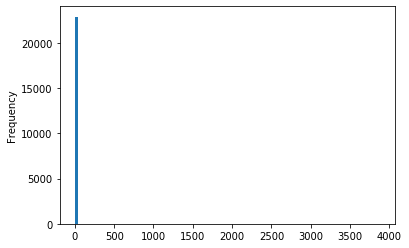

In [76]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

print('# of unique queries:', df['query'].nunique())

dfg = df.groupby('query').size().reset_index(name='counts')

# number of queries that happens those number of times for example 19723 queries happens only one 
cg = dfg.groupby('counts')

print(cg.size())
#for index, group in cg:
#    print(index, group.size)



dfg['counts'].plot.hist(bins=100)
plt.show()


In [43]:
import ast

workflow =  ast.literal_eval(df['workflow'].iloc[0])
print(workflow['mapreduce.workflow.id'])

TypeError: string indices must be integers

In [44]:
df['query']

0        SELECT MAX(asup_id) FROM default.cluster_table...
1        \n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc...
2        select count(*) from default.DFM_SERVICE where...
3        INSERT OVERWRITE LOCAL DIRECTORY './tmp.9iTupC...
4        SELECT MAX(asup_id) FROM default.system WHERE ...
                               ...                        
98722    SELECT MAX(asup_id) FROM default.cluster_table...
98723    SELECT MAX(asup_id) FROM default.asup WHERE dt...
98724    \ncreate table if not exists guestdb.asup_cmod...
98725    \n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc...
98726    \n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc...
Name: query, Length: 98727, dtype: object

In [49]:
print(df['query'].iloc[0])
print(df['query'].iloc[500])

print(df['query'].iloc[5000])

SELECT MAX(asup_id) FROM default.cluster_table WHERE dt = '20180810'
SELECT MAX(asup_id) FROM default.asup WHERE dt = '20180810'
select count(*) from default.SYSTEM_ENVIRONMENT_INFO where dt = "20180805"


In [50]:
print(dfg.iloc[dfg['counts'].argmax()]['query'])

SELECT MAX(asup_id) FROM default.system WHERE dt = '20180812'


/home/maniaa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [176]:
with open('example.inputs', 'r') as dfd:
    inputsdir = [f.replace('hdfs://datalake-nnha/tmp/hive/bin/8221db2d-1fcd-4a77-a917-c34c1faa5b30/hive_2018-08-15_10-10-46_684_3917296567308196712-646/-mr-10853/', '') for f in dfd.read().split(',')]
    for i in inputsdir:
        print(inputsdir.count(i))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
impo